In [4]:
import pandas as pd                 #for working with data in Python
import numpy as np
import matplotlib.pyplot as plt     #for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#use Pandas to read in csv files. The pd.read_csv() method creates a DataFrame from a csv file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("1 \n")

#check out the size of the data
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

1 

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [6]:
#look at a few rows using the DataFrame.head() method
#train.head()
(train.head())

#to do some plotting
# plt.style.use(style='ggplot')
# plt.rcParams['figure.figsize'] = (10, 6)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#######################################################
#  2. Explore the data and engineer Features          ###
#######################################################


In [8]:
#to get more information like count, mean, std, min, max etc
#train.SalePrice.describe()
(train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


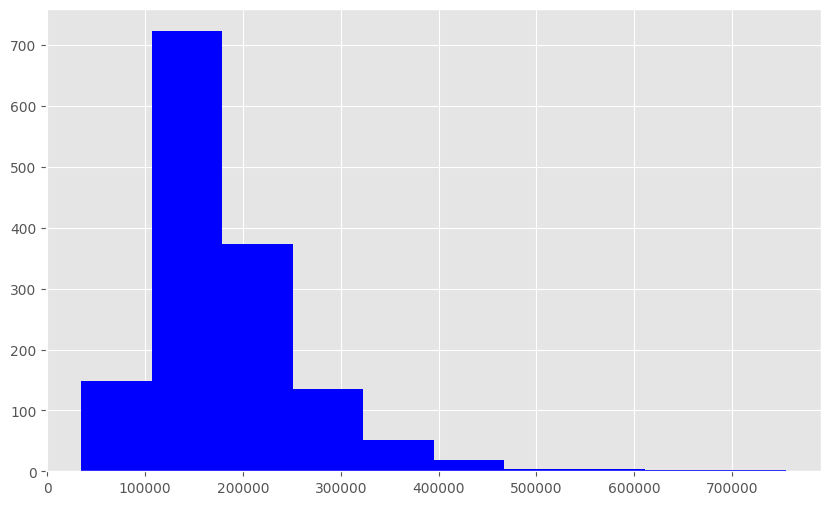

In [9]:
#to plot a histogram of SalePrice
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()


 Skew is: 0.12133506220520406


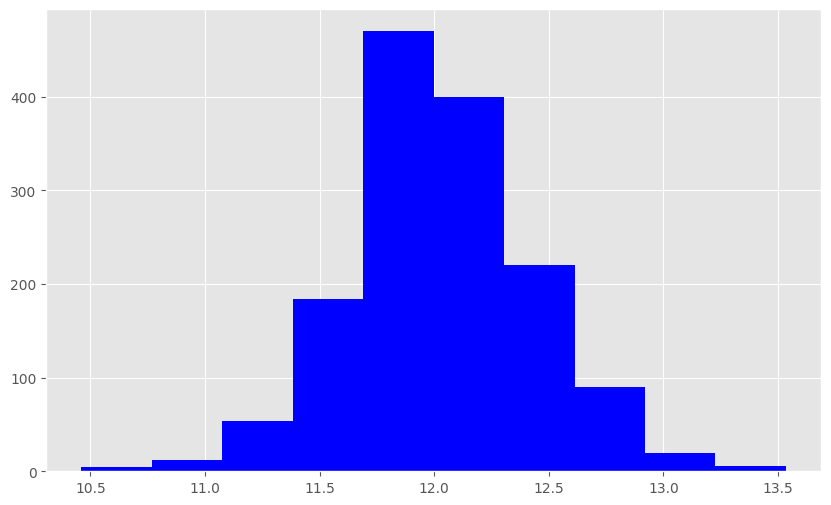

In [10]:
# use np.log() to transform train.SalePric and calculate the skewness a second time, as well as re-plot the data
target = np.log(train.SalePrice)
print ("\n Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

#######################################################
##   Working with Numeric Features                   ###
#######################################################

In [11]:
#return a subset of columns matching the specified data types
numeric_features = train.select_dtypes(include=[np.number])
#numeric_features.dtypes
(numeric_features.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [12]:
#displays the correlation between the columns and examine the correlations between the features and the target.
corr = numeric_features.corr()

#The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [14]:

#to get the unique values that a particular column has.
# train.OverallQual.unique()
print(train.OverallQual.unique())


[ 7  6  8  5  9  4 10  3  1  2]


In [16]:

"""
#investigate the relationship between OverallQual and SalePrice.
#We set index='OverallQual' and values='SalePrice'. We chose to look at the median here.
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
print(quality_pivot)
"""

quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
(quality_pivot)

C:\Users\razum\AppData\Local\Temp\ipykernel_1796\3731936573.py:8: FutureWarning: The provided callable <function median at 0x0000021F46CF5670> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)


,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,86250.0
4,108000.0
5,133000.0
6,160000.0
7,200141.0
8,269750.0
9,345000.0


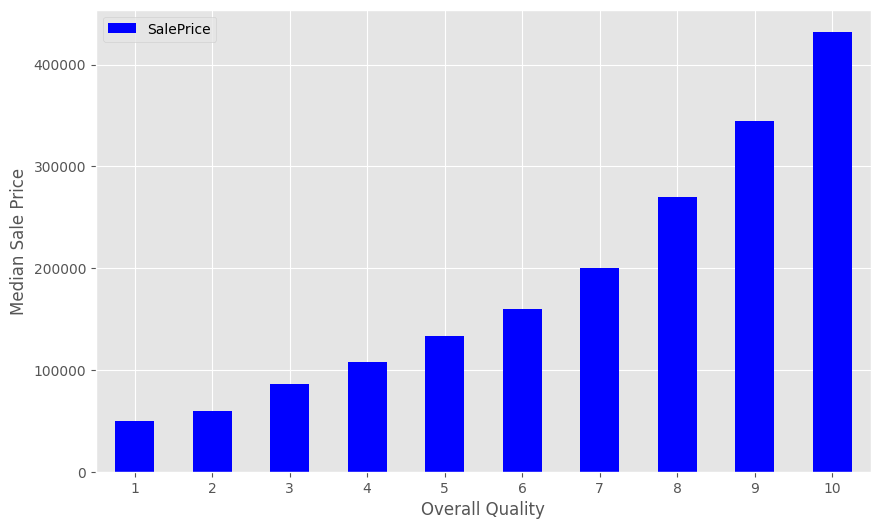

In [17]:
#visualize this pivot table more easily, we can create a bar plot
#Notice that the median sales price strictly increases as Overall Quality increases.
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


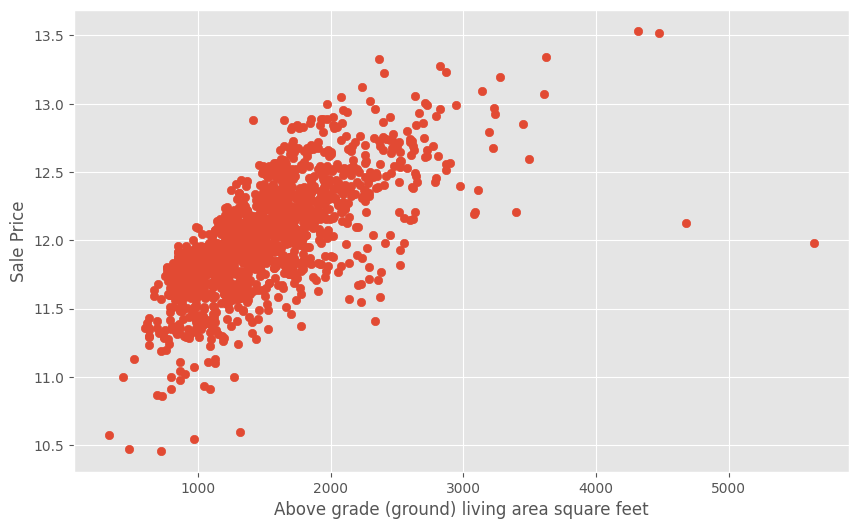

In [19]:
#to generate some scatter plots and visualize the relationship between the Ground Living Area(GrLivArea) and SalePrice
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

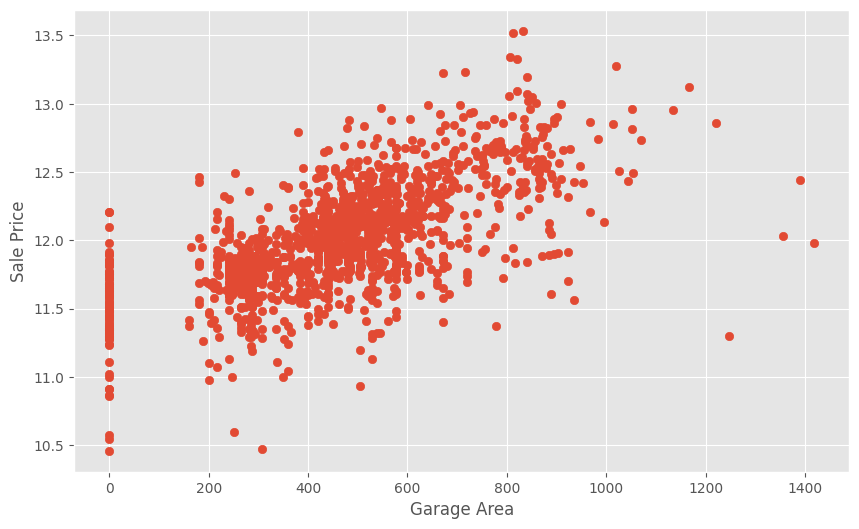

In [20]:
#do the same for GarageArea
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

#######################################################
# create a new dataframe with some outliers removed ###
#######################################################

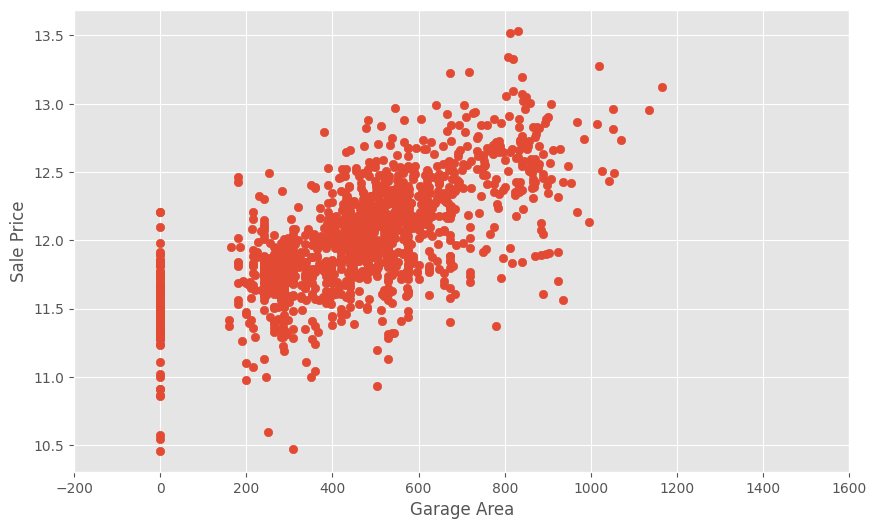

In [21]:
#create a new dataframe with some outliers removed
train = train[train['GarageArea'] < 1200]

#display the previous graph again without outliers
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [23]:
######################################################
#   Handling Null Values                            ##
######################################################


#create a DataFrame to view the top null columns and return the counts of the null values in each column
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls
(nulls)

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
MasVnrType,871
FireplaceQu,689
LotFrontage,258
GarageYrBlt,81
GarageCond,81


In [ ]:
print("15 \n")
"""
#to return a list of the unique values
print ("Unique values are:", train.MiscFeature.unique())
"""

In [24]:
######################################################
#   Wrangling the non-numeric Features              ##
######################################################

print("16 \n")

#consider the non-numeric features and display details of columns
categoricals = train.select_dtypes(exclude=[np.number])
#categoricals.describe()
(categoricals.describe())

16 



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,584,1455,1455,1455,1418,1418,1417,1418,1417,1455,1455,1455,1454,1455,1455,766,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,1441,1216,722,1139,1430,514,503,443,905,1278,644,647,1306,951,428,1251,1423,737,1360,1329,733,1355,377,867,605,1306,1321,1335,2,157,48,1266,1196


######################################################
#   Transforming and engineering features           ##
######################################################

In [26]:
#When transforming features, it's important to remember that any transformations that you've applied to the training data before
# fitting the model must be applied to the test data.

#Eg:
print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Street
Pave    1450
Grvl       5
Name: count, dtype: int64 



In [30]:
#our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.
#create a new column called enc_street. The pd.get_dummies() method will handle this for us
# One-hot кодирование столбца Street в train
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

# One-hot кодирование столбца Street в test
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

print ('Encoded: \n')
print (train.enc_street.value_counts())  #Pave and Grvl values converted into 1 and 0

Encoded: 

enc_street
True     1450
False       5
Name: count, dtype: int64


C:\Users\razum\AppData\Local\Temp\ipykernel_1796\756295238.py:2: FutureWarning: The provided callable <function median at 0x0000021F46CF5670> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)


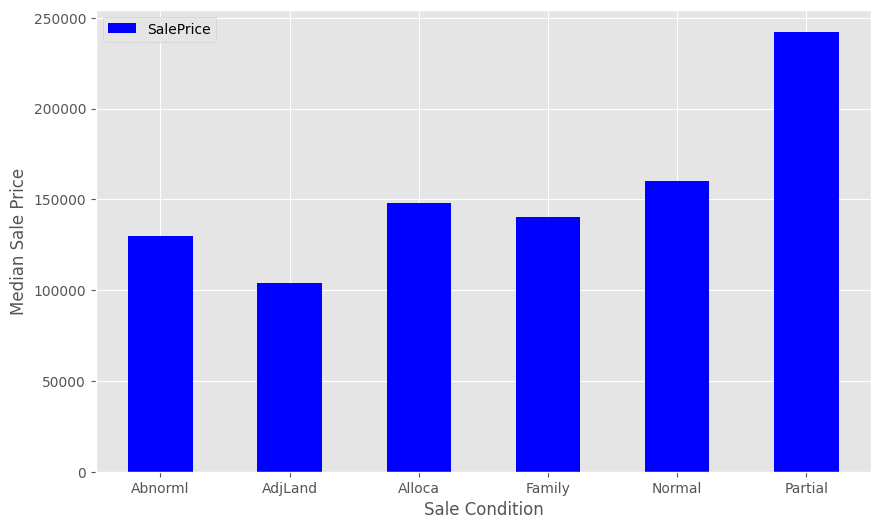

In [31]:
#look at SaleCondition by constructing and plotting a pivot table, as we did above for OverallQual
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [32]:
#encode this SaleCondition as a new feature by using a similar method that we used for Street above
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

C:\Users\razum\AppData\Local\Temp\ipykernel_1796\4286872019.py:2: FutureWarning: The provided callable <function median at 0x0000021F46CF5670> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)


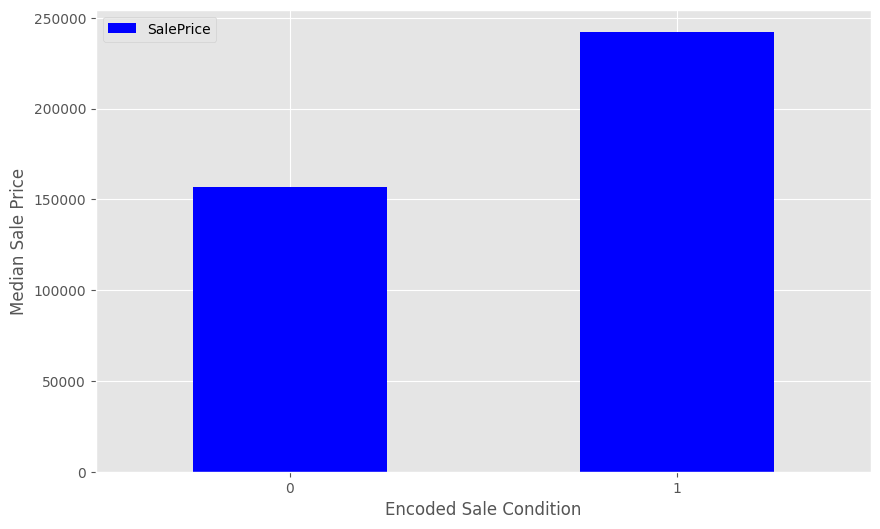

In [33]:
#explore this newly modified feature as a plot.
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

######################################################################################################
###   Dealing with missing values                                                                      #
### We'll fill the missing values with an average value and then assign the results to data          #
###   This is a method of interpolation                                                                #
######################################################################################################

In [34]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()


#Check if the all of the columns have 0 null values.
#sum(data.isnull().sum() != 0)
(sum(data.isnull().sum() != 0))



21 

0
22 



######################################################
#  3. Build a linear model                             ##
######################################################

In [35]:
#separate the features and the target variable for modeling.
# We will assign the features to X and the target variable(Sales Price)to y.

y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)
#exclude ID from features since Id is just an index with no relationship to SalePrice.

In [39]:

#exclude ID from features since Id is just an index with no relationship to SalePrice.

#======= partition the data ===================================================================================================#
#   Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before.
#   If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.
#==============================================================================================================================#
#also state how many percentage from train data set, we want to take as test data set
#In this example, about 33% of the data is devoted to the hold-out set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [40]:
#========= Begin modelling =========================#
#    Linear Regression Model                        #
#===================================================#

#----    first create a Linear Regression model.
# First, we instantiate the model.
lr = linear_model.LinearRegression()

#----   fit the model / Model fitting
#lr.fit() method will fit the linear regression on the features and target variable that we pass.
model = lr.fit(X_train, y_train)

In [41]:
#----   Evaluate the performance and visualize results
#r-squared value is a measure of how close the data are to the fitted regression line
# a higher r-squared value means a better fit(very close to value 1)
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8883509099666326


In [42]:
#use the model we have built to make predictions on the test data set.
predictions = model.predict(X_test)

print("24 \n")
#calculates the rmse
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

24 

RMSE is: 
 0.01782532786310256


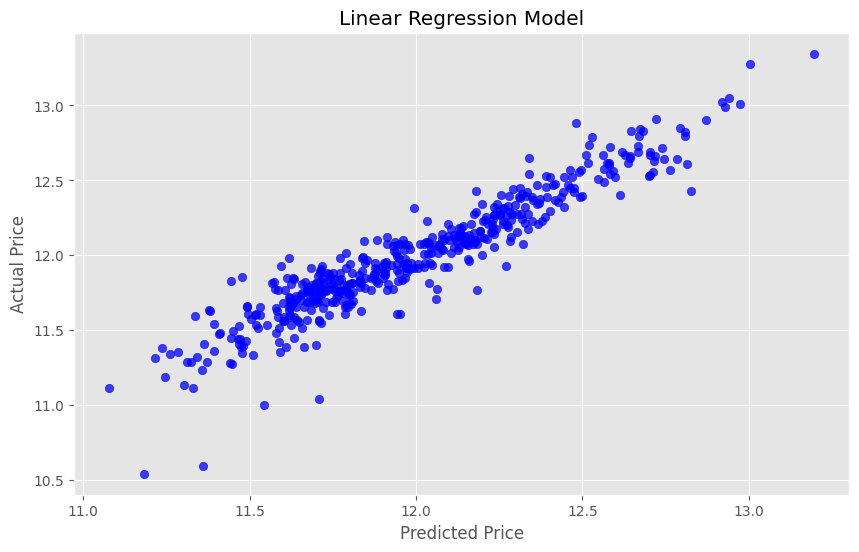

In [43]:
#view this relationship between predictions and actual_values graphically with a scatter plot.
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

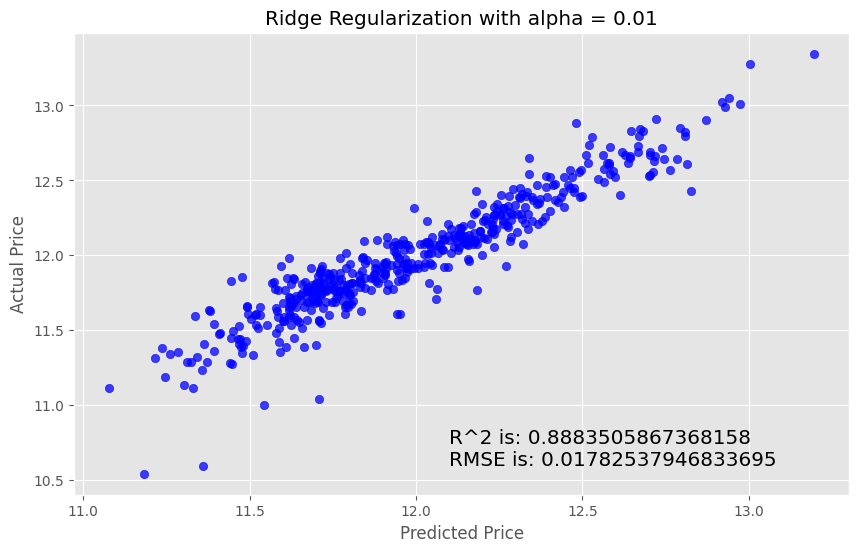

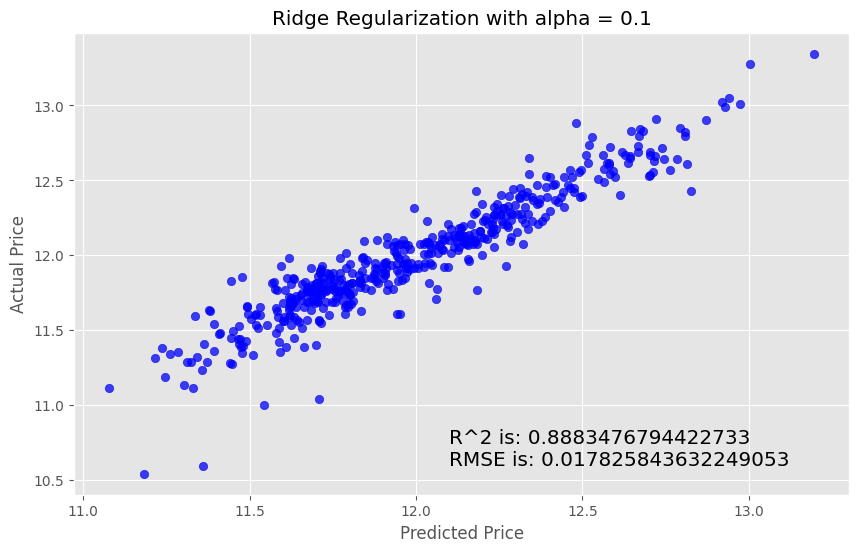

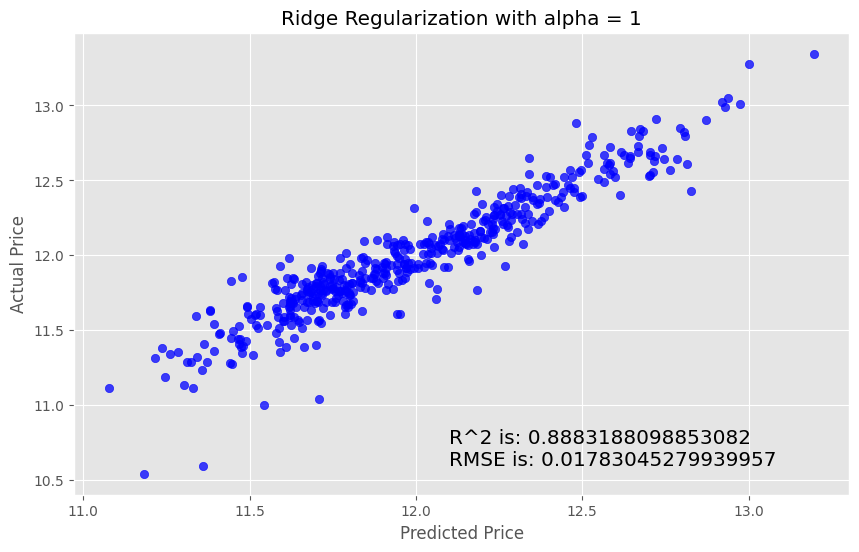

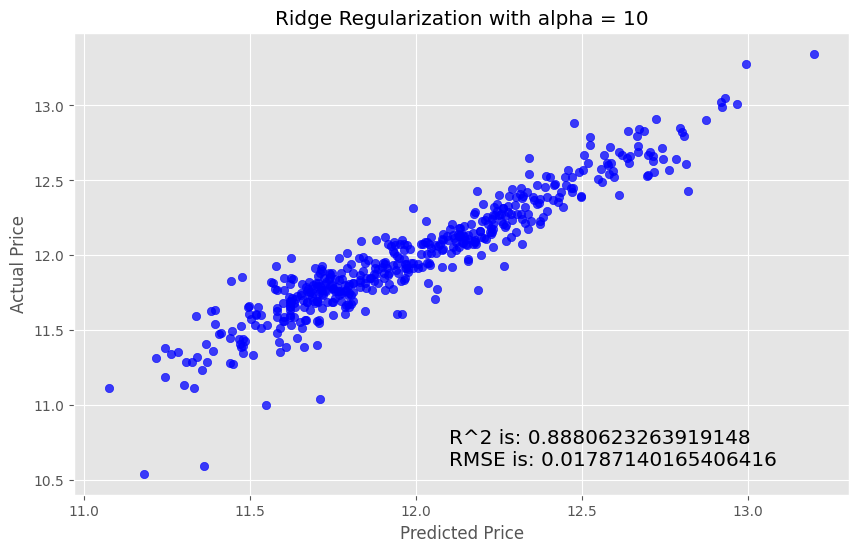

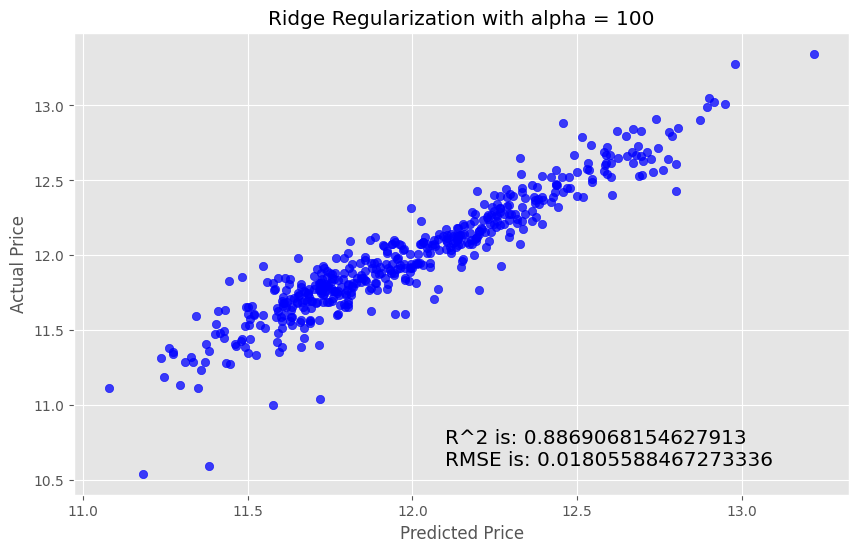

27 

R^2 is: 
 0.8883509099666326


In [45]:
#====== improve the model ================================================================#
#  try using Ridge Regularization to decrease the influence of less important features    #
#=========================================================================================#

# Experiment by looping through a few different values of alpha, and see how this changes our results.

for i in range(-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(overlay, xy=(12.1, 10.6), size='x-large')
    plt.show()

# If you examined the plots you can see these models perform almost identically to the first model.
# In our case, adjusting the alpha did not substantially improve our model.

print("27 \n")
print("R^2 is: \n", model.score(X_test, y_test))

In [46]:
######################################################
#    4.  Make a submission                          ##
######################################################

#create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.
submission = pd.DataFrame()
#The first column must the contain the ID from the test data.
submission['Id'] = test.Id

#select the features from the test data for the model as we did above.
feats = test.select_dtypes(
    include=[np.number]).drop(['Id'], axis=1).interpolate()

#generate our predictions.
predictions = model.predict(feats)

#transform the predictions to the correct form.
#apply np.exp() to our predictions becasuse we have taken the logarithm(np.log()) previously.
final_predictions = np.exp(predictions)

In [47]:
#check the difference
print("Original predictions are: \n", predictions[:10], "\n")
print("Final predictions are: \n", final_predictions[:10])

Original predictions are: 
 [11.76015115 11.70293438 12.07323941 12.20563751 12.10732981 12.05565163
 12.15947968 12.01695262 12.16932832 11.65716111] 

Final predictions are: 
 [128046.80582342 120926.03777843 175122.21974384 199912.99134382
 181195.13262268 172069.13692069 190895.16371644 165537.43076278
 192784.51056649 115515.62810329]


In [48]:

#assign these predictions
submission['SalePrice'] = final_predictions
#submission.head()
print(submission.head())

#export to a .csv file as Kaggle expects.
# pass index=False because Pandas otherwise would create a new index for us.
submission.to_csv('submission1.csv', index=False)


print("\n Finish")

     Id      SalePrice
0  1461  128046.805823
1  1462  120926.037778
2  1463  175122.219744
3  1464  199912.991344
4  1465  181195.132623

 Finish
